# question 1 - relationship between polynomial functions and kernel functions

Polynomial functions and kernel functions are both mathematical concepts used in machine learning algorithms, especially in the context of Support Vector Machines (SVMs) and other kernel-based methods. They play a crucial role in transforming data into higher-dimensional spaces, where certain algorithms can better capture complex patterns and relationships.

1. **Polynomial Functions**:
A polynomial function is a mathematical expression involving variables and coefficients, where the variables are raised to non-negative integer powers. For example, a simple polynomial function of degree 2 in one variable x can be written as: \( f(x) = ax^2 + bx + c \), where \( a \), \( b \), and \( c \) are coefficients.

In machine learning, polynomial functions are often used to transform the input data into a higher-dimensional space, enabling linear algorithms to capture more complex patterns. SVMs with polynomial kernels use polynomial functions to implicitly transform the data into a higher-dimensional space, making them suitable for non-linear classification tasks.

2. **Kernel Functions**:
Kernel functions are a central concept in machine learning algorithms like Support Vector Machines (SVMs) and Kernel Principal Component Analysis (Kernel PCA). Kernels provide a way to compute the similarity between data points without explicitly transforming them into higher-dimensional spaces. Kernels are often associated with the "kernel trick," which allows you to work in the original feature space while implicitly operating in a higher-dimensional space.

Polynomial functions can also be used as kernel functions. The polynomial kernel function, given two vectors \( x \) and \( y \), is defined as: \( K(x, y) = (x^T y + c)^d \), where \( d \) is the degree of the polynomial and \( c \) is an optional constant.

In summary, the relationship between polynomial functions and kernel functions in machine learning algorithms, especially SVMs, is that polynomial functions can be used as kernel functions to implicitly transform data into higher-dimensional spaces. The polynomial kernel captures non-linear relationships between data points without explicitly calculating the transformation, thanks to the kernel trick. Other kernel functions, such as the Gaussian (RBF) kernel, are also used to achieve similar transformations for different types of non-linear patterns.

# question 2 -- poly kernel

Accuracy: 0.73


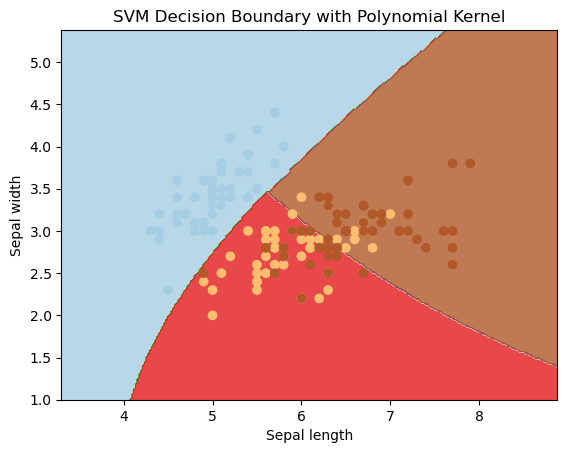

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # We'll use the first two features for simplicity
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a polynomial kernel
svm_poly = SVC(kernel='poly', degree=3)  # You can adjust the degree as needed
svm_poly.fit(X_train, y_train)

# Predict on the test set
y_pred = svm_poly.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Create a meshgrid to plot the decision boundary
h = 0.02  # Step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the labels for each point in the meshgrid
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and data points
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM Decision Boundary with Polynomial Kernel')
plt.show()


# question 3 -- epsilon and support vectors in SVR

In Support Vector Regression (SVR), epsilon (\( \varepsilon \)) plays a critical role in defining the margin of error or tolerance around the regression line. The regression line is created in such a way that a certain proportion of the training data points, known as support vectors, fall within the epsilon-tube around the line. These support vectors directly contribute to the formation of the regression line and thus have a significant impact on the model's performance and complexity.

The effect of increasing the value of epsilon on the number of support vectors in SVR depends on the characteristics of the data and the desired level of tolerance. Here are a few scenarios to consider:

1. **Small Epsilon**:
   - A smaller epsilon leads to a narrower tolerance around the regression line.
   - As epsilon decreases, the SVR model becomes more strict, and fewer data points are allowed to lie within the epsilon-tube.
   - This can result in a smaller number of support vectors.
   - The regression line might fit the training data points more closely, possibly resulting in higher training accuracy.
   - However, the model might be sensitive to noise in the data and overfitting is more likely to occur.

2. **Large Epsilon**:
   - A larger epsilon implies a wider tolerance around the regression line.
   - With a larger epsilon, more data points are allowed to fall within the epsilon-tube.
   - This can result in a larger number of support vectors.
   - The regression line might be more robust to noise in the data, but it might not fit the training data points as closely.
   - The model could be less prone to overfitting.

3. **Balanced Epsilon**:
   - Choosing an epsilon that is appropriate for the problem at hand is crucial.
   - It should strike a balance between fitting the data well and avoiding overfitting.
   - The number of support vectors is influenced by epsilon, but it is also influenced by the complexity of the data distribution and the model's capacity.

In summary, increasing the value of epsilon in SVR generally tends to increase the number of support vectors, as it allows more data points to be considered as part of the support vector set. However, the specific effect on the number of support vectors depends on the data, the desired level of tolerance, and the trade-off between fitting the training data closely and preventing overfitting. It's important to choose an appropriate epsilon value based on the characteristics of your data and the goals of your regression task.

# question 4 -- kernel functions, c parameter , epsilon parameter, gamma parameter

Support Vector Regression (SVR) is a powerful technique for regression tasks that uses the principles of Support Vector Machines (SVMs). The choice of kernel function, C parameter, epsilon parameter, and gamma parameter can significantly impact the performance of SVR. Let's explore each of these parameters and their effects:

1. **Kernel Function**:
   The kernel function determines how SVR will capture non-linear relationships between features. Common kernel functions include linear, polynomial, radial basis function (RBF), and sigmoid.
   
   - **Linear Kernel**: Suitable for linear relationships between features.
   - **Polynomial Kernel**: Useful for moderately non-linear data. The degree parameter controls the degree of the polynomial.
   - **RBF (Radial Basis Function) Kernel**: Suitable for highly non-linear data. The gamma parameter controls the kernel width.
   - **Sigmoid Kernel**: Can capture non-linear relationships, but it's less commonly used.
   
   **Example**: If your data shows complex non-linear patterns, using an RBF kernel with a suitable gamma value might yield better results. If your data is nearly linear, a linear kernel could be sufficient.

2. **C Parameter (Regularization)**:
   The C parameter controls the trade-off between minimizing training error and minimizing the complexity (number of support vectors) of the model. A smaller C allows more errors but a larger margin, while a larger C makes the margin smaller but tries to reduce the errors.
   
   - A small C may lead to a simpler model that might generalize better, but it could tolerate more training errors.
   - A large C will result in a more complex model with fewer training errors.
   
   **Example**: If you want your model to be more robust to outliers and prioritize generalization, you might choose a smaller C. If you want your model to fit the training data more closely and don't mind some overfitting, you might choose a larger C.

3. **Epsilon Parameter (Tube Width)**:
   Epsilon (\( \varepsilon \)) defines the width of the epsilon-tube around the regression line. It controls the tolerance of the errors for data points falling within this tube.
   
   - A smaller epsilon leads to a narrower tolerance around the regression line.
   - A larger epsilon implies a wider tolerance.
   
   **Example**: If your data is relatively noisy, you might increase epsilon to allow for more tolerance around the regression line. If you have confidence in the accuracy of your data, you might decrease epsilon for a stricter fit.

4. **Gamma Parameter (Kernel Coefficient)**:
   The gamma parameter is specific to the RBF kernel. It controls the shape of the Gaussian function used in the kernel. A smaller gamma results in a wider curve, while a larger gamma makes the curve narrower.
   
   - A small gamma will result in a smoother decision boundary.
   - A large gamma can lead to a decision boundary that is highly influenced by individual data points.
   
   **Example**: If your RBF kernel SVR model is overfitting, consider reducing gamma to make the decision boundary smoother. If it's underfitting, increasing gamma might help capture more intricate patterns.

In summary, the choice of kernel function, C parameter, epsilon parameter, and gamma parameter in SVR is a crucial part of model tuning. The ideal values depend on the nature of your data, the presence of noise or outliers, and your goals in terms of model complexity and generalization. Experimenting with different parameter values and using techniques like cross-validation can help you determine the best combination for your specific regression task.

# question 5 

already done in previous assignment with iris dataset